In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

Let's begin by getting the data from postgres.

In [2]:
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifex = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

## Data cleaning

Now that we have loaded the data, we can begin to clean it. Let's use the info() function to get a good look at the types of the data.

In [3]:
lifex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

The data types make sense for the variables, but the names need to be cleaned.

In [4]:
lifexclean = lifex.copy()
lifexclean.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV"," thinness  1-19 years":"Thinness_10to19_years"," thinness 5-9 years":"Thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)

In [5]:
lifexclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                     2938 non-null object
Year                        2938 non-null int64
Status                      2938 non-null object
Life_Expectancy             2928 non-null float64
Adult_Mortality             2928 non-null float64
Infant_Deaths               2938 non-null int64
Alcohol                     2744 non-null float64
Percentage_Exp              2938 non-null float64
HepatitisB                  2385 non-null float64
Measles                     2938 non-null int64
BMI                         2904 non-null float64
Under_Five_Deaths           2938 non-null int64
Polio                       2919 non-null float64
Tot_Exp                     2712 non-null float64
Diphtheria                  2919 non-null float64
HIV                         2938 non-null float64
GDP                         2490 non-null float64
Population                  2286 non-null float64
Thi

Much better! Now let's use describe to get a better feel for the data.

In [6]:
lifexclean.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,BMI,Under_Five_Deaths,Polio,Tot_Exp,Diphtheria,HIV,GDP,Population,Thinness_10to19_years,Thinness_5to9_years,Income_Comp_Of_Resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Now, let's focus on nulls and outliers.

Let's find out how much data in our dataset contain null values.

In [7]:
lifexclean.isnull().sum()*100/lifexclean.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Tot_Exp                      7.692308
Diphtheria                   0.646698
HIV                          0.000000
GDP                         15.248468
Population                  22.191967
Thinness_10to19_years        1.157250
Thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

Looks like we have quite a few null values! A reason for these null values could be a country lacked reported data for a variable, so the data set had nothing to put down.

Let's work on fixing them. We'll use interpolation since our data is time series, and drop the nulls afterwards.

In [8]:
country_list = lifexclean.Country.unique()
fill_list = ['Life_Expectancy','Adult_Mortality','Alcohol','HepatitisB','BMI','Polio','Tot_Exp','Diphtheria','GDP','Population','Thinness_10to19_years','Thinness_5to9_years','Income_Comp_Of_Resources','Schooling']
for country in country_list:
    lifexclean.loc[lifexclean['Country'] == country,fill_list] = lifexclean.loc[lifexclean['Country'] == country,fill_list].interpolate()
    
lifexclean.dropna(inplace=True)

In [9]:
lifexclean.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Tot_Exp                     0
Diphtheria                  0
HIV                         0
GDP                         0
Population                  0
Thinness_10to19_years       0
Thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

Great!

Let's begin Univariate Analysis. We'll visualize the distributions of the features in order to check their normality (for numerical features) and their frequency across different levels (for categorical features).

In [10]:
lifexclean.describe(include=['O'])

,Country,Status
count,1987,1987
unique,133,2
top,Albania,Developing
freq,16,1702


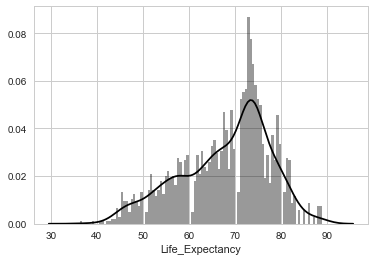

In [11]:
sns.distplot(lifexclean['Life_Expectancy'], bins=100, color='k')

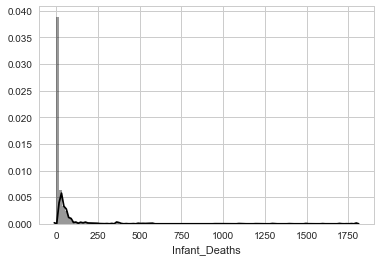

In [12]:
sns.distplot(lifexclean['Infant_Deaths'], bins=100, color='k')

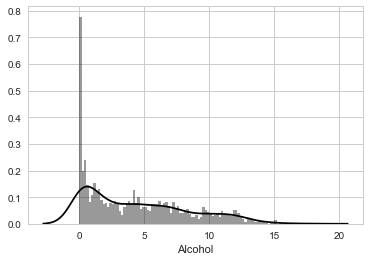

In [13]:
sns.distplot(lifexclean['Alcohol'], bins=100, color='k')

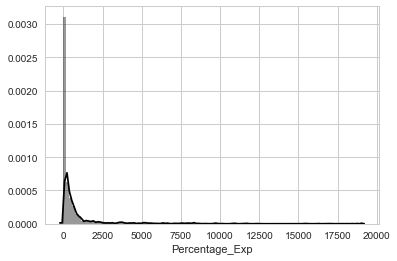

In [14]:
sns.distplot(lifexclean['Percentage_Exp'], bins=100, color='k')

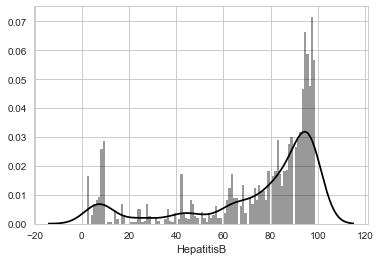

In [15]:
sns.distplot(lifexclean['HepatitisB'], bins=100, color='k')

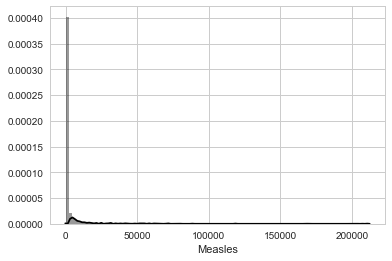

In [16]:
sns.distplot(lifexclean['Measles'], bins=100, color='k')

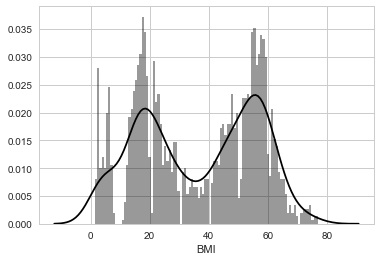

In [17]:
sns.distplot(lifexclean['BMI'], bins=100, color='k')

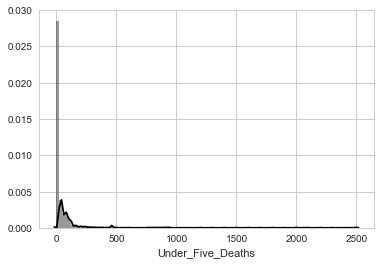

In [18]:
sns.distplot(lifexclean['Under_Five_Deaths'], bins=100, color='k')

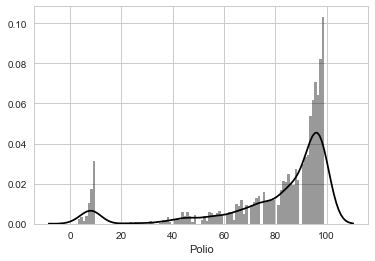

In [19]:
sns.distplot(lifexclean['Polio'], bins=100, color='k')

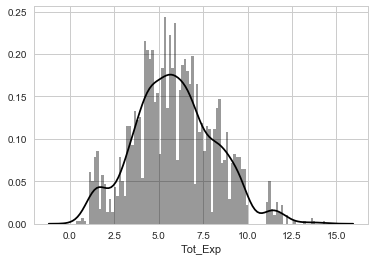

In [20]:
sns.distplot(lifexclean['Tot_Exp'], bins=100, color='k')

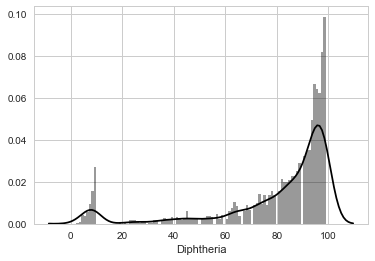

In [21]:
sns.distplot(lifexclean['Diphtheria'], bins=100, color='k')

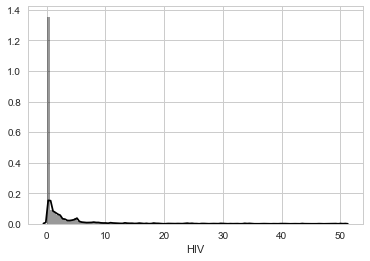

In [22]:
sns.distplot(lifexclean['HIV'], bins=100, color='k')

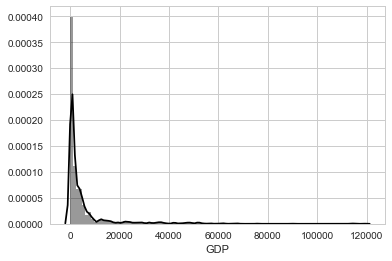

In [23]:
sns.distplot(lifexclean['GDP'], bins=100, color='k')

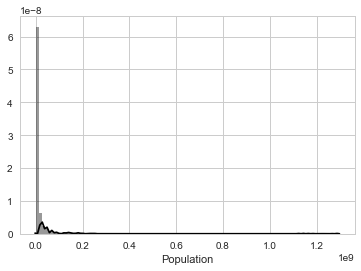

In [24]:
sns.distplot(lifexclean['Population'], bins=100, color='k')

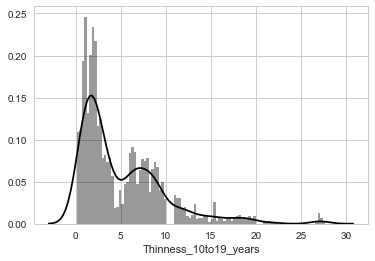

In [25]:
sns.distplot(lifexclean['Thinness_10to19_years'], bins=100, color='k')

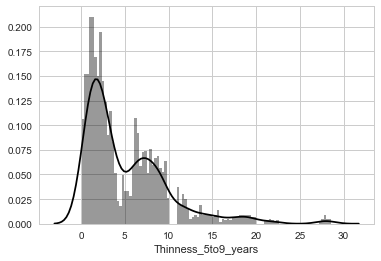

In [26]:
sns.distplot(lifexclean['Thinness_5to9_years'], bins=100, color='k')

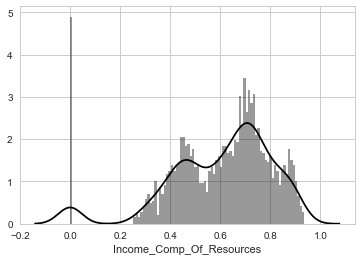

In [27]:
sns.distplot(lifexclean['Income_Comp_Of_Resources'], bins=100, color='k')

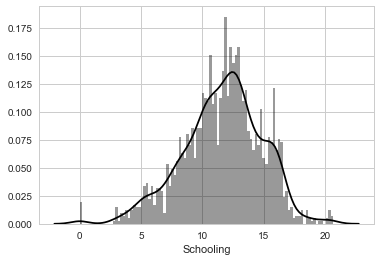

In [28]:
sns.distplot(lifexclean['Schooling'], bins=100, color='k')

Now, we can begin with the outliers.

Since we have a large amount of variables, let's find the outliers in our dataset statisitcally. 

In [29]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,
            'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Tot_Exp':11,
            'Diphtheria':12,'HIV':13,'GDP':14,'Population':15,'Thinness_10to19_years':16,
            'Thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

for variable in col_dict.keys():
    q75, q25 = np.percentile(lifexclean[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
len((np.where((lifexclean[variable] > max_val) | 
(lifexclean[variable] < min_val))[0])),len((np.where((lifexclean[variable] > max_val) | 
(lifexclean[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult_Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Infant_Deaths : 198 and 9.96477101157524
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in Percentage_Exp : 232 and 11.675893306492199
Number of outliers and percentage of it in HepatitisB : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles : 361 and 18.16809260191243
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Tot_Exp : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria : 195 and 9.813789632611979
Number of outliers and perce

Now that we know where the outliers are, let's use winsorizing to fix them.

In [30]:
winsorized_Life_Expectancy = winsorize(lifexclean['Life_Expectancy'],(0.01,0))
winsorized_Adult_Mortality = winsorize(lifexclean['Adult_Mortality'],(0,0.03))
winsorized_Infant_Deaths = winsorize(lifexclean['Infant_Deaths'],(0,0.10))
winsorized_Alcohol = winsorize(lifexclean['Alcohol'],(0,0.01))
winsorized_Percentage_Exp = winsorize(lifexclean['Percentage_Exp'],(0,0.12))
winsorized_HepatitisB = winsorize(lifexclean['HepatitisB'],(0.11,0))
winsorized_Measles = winsorize(lifexclean['Measles'],(0,0.19))
winsorized_Under_Five_Deaths = winsorize(lifexclean['Under_Five_Deaths'],(0,0.12))
winsorized_Polio = winsorize(lifexclean['Polio'],(0.09,0))
winsorized_Tot_Exp = winsorize(lifexclean['Tot_Exp'],(0,0.01))
winsorized_Diphtheria = winsorize(lifexclean['Diphtheria'],(0.10,0))
winsorized_HIV = winsorize(lifexclean['HIV'],(0,0.16))
winsorized_GDP = winsorize(lifexclean['GDP'],(0,0.13))
winsorized_Population = winsorize(lifexclean['Population'],(0,0.14))
winsorized_Thinness_10to19_years = winsorize(lifexclean['Thinness_10to19_years'],(0,0.04))
winsorized_Thinness_5to9_years = winsorize(lifexclean['Thinness_5to9_years'],(0,0.04))
winsorized_Income_Comp_Of_Resources = winsorize(lifexclean['Income_Comp_Of_Resources'],(0.05,0))
winsorized_Schooling = winsorize(lifexclean['Schooling'],(0.02,0.01))

In [31]:
win_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,
            winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_Thinness_10to19_years,winsorized_Thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in win_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization : {}".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0
Number of outliers after winsorization : 0


Good. Now we can add the variables to our data frame.

In [33]:
lifexclean['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
lifexclean['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
lifexclean['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
lifexclean['winsorized_Alcohol'] = winsorized_Alcohol
lifexclean['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
lifexclean['winsorized_HepatitisB'] = winsorized_HepatitisB
lifexclean['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
lifexclean['winsorized_Polio'] = winsorized_Polio
lifexclean['winsorized_Tot_Exp'] = winsorized_Tot_Exp
lifexclean['winsorized_Diphtheria'] = winsorized_Diphtheria
lifexclean['winsorized_HIV'] = winsorized_HIV
lifexclean['winsorized_GDP'] = winsorized_GDP
lifexclean['winsorized_Population'] = winsorized_Population
lifexclean['winsorized_Thinness_10to19_years'] = winsorized_Thinness_10to19_years
lifexclean['winsorized_Thinness_5to9_years'] = winsorized_Thinness_5to9_years
lifexclean['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
lifexclean['winsorized_Schooling'] = winsorized_Schooling

# Feature engineering

Let's create a heatmap in order to test correlations.

In [34]:
lifexclean_win = lifexclean.iloc[:,22:]
lifexclean_win['BMI'] = lifexclean['BMI']
lifexclean_win['Country'] = lifexclean['Country']
lifexclean_win['Year'] = lifexclean['Year']
lifexclean_win['Status'] = lifexclean['Status']
lifexclean_win_corr = lifexclean_win.iloc[:,:-3]
cormat = lifexclean_win_corr.corr()

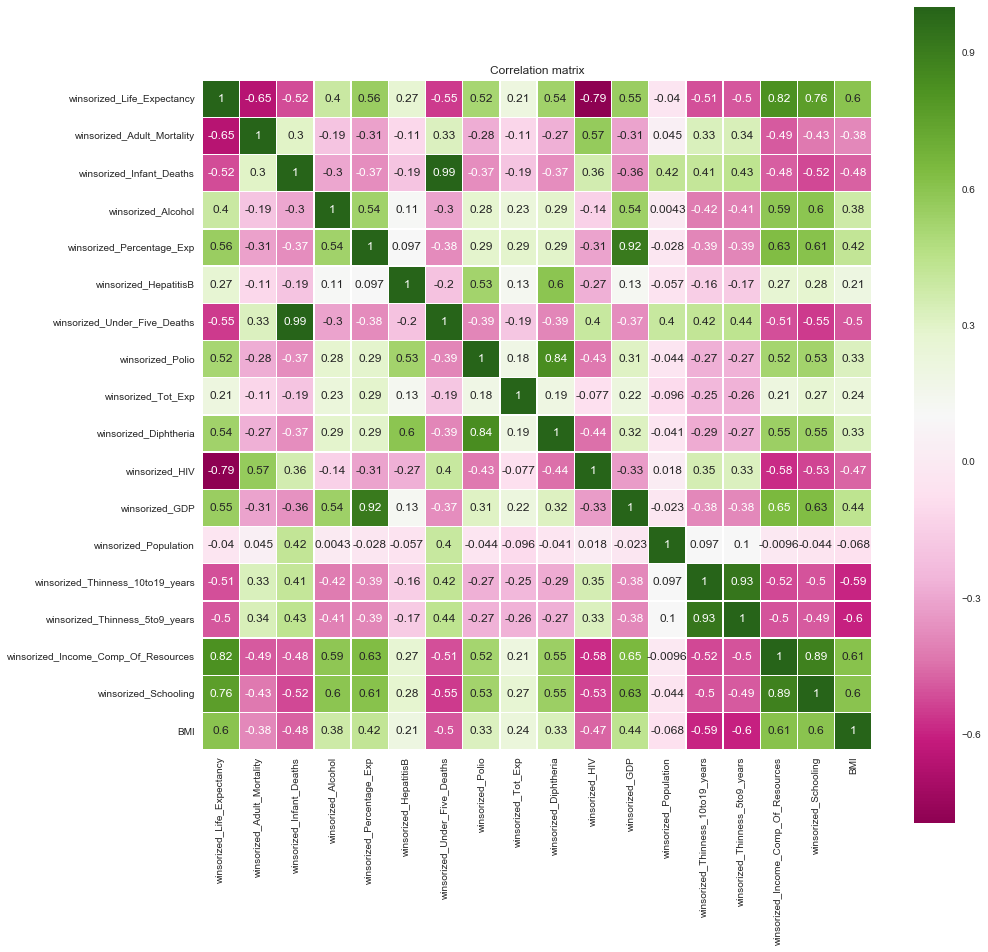

In [35]:
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, linewidths=.5,cmap="PiYG")
plt.title("Correlation matrix")
plt.show()

As we can see, the 5 factors most correlated to Life Expectancy are Income_Comp_Of_Resources,HIV,Schooling,BMI, and Adult Mortality. 

Let's see if these factors are correlated with each other. I will interpret higher than .8 correlation as high correlation.

Based on the heatmap:
Income_Comp_Of_Resources has high correlation with Schooling.

Since Income_Comp_Of_Resources has a higher correlation with Life Expectancy, I will remove Schooling as one of my factors.

Let's test if status should be one of my factors using a t-test. If status, a categorical variable, passes the test, I will consider it as a factor.

In [36]:
stats.ttest_ind(lifexclean_win.loc[lifexclean_win['Status']=='Developed','winsorized_Life_Expectancy'],lifexclean_win.loc[lifexclean_win['Status']=='Developing','winsorized_Life_Expectancy'])

Ttest_indResult(statistic=23.02232052151534, pvalue=3.793119218299665e-104)

Since the p-value is lower than .05, I will consider it as one of my factors.

# Conclusion

The purpose of this challenge is to find the factors most related to life expectancy. By using a heatmap and selecting the most correlated variables, and by using a t-test with the status variable to see if it was significant, I ended up with my factors being Income_Comp_Of_Resources,HIV,BMI, Adult Mortality, and Status. 
Some other takeaways: 
* Income_Comp_Of_Resources (which is GNI - Gross National Income - per capita) is more correlated with life expectancy than GDP (which is in per capita). Perhaps this shows that GNI might be a better measure than GDP when measuring a countries quality of life.
* HIV (deaths due to HIV) and BMI are the two health - related factors in my feature selection.
* Infant deaths and adult mortality have similar correlations for all variables except for population. The higher the population, the higher the adult mortality BUT lower the infant deaths